**Reinforcement Learning Assignment**


> Submitted By Rishi Gupta (20231111)



**Import Python Libraries**

In [49]:
import random
import sys
import numpy as np
import matplotlib.pyplot as plt

**Define Global variables for FrozenLake Environment**

In [50]:
# global variables
LAKE_ROWS = 5
LAKE_COLS = 5
WIN_STATE = (4, 4)
LOSE_STATE = [(1, 0),(1, 3),(3, 1),(4, 2)]
START = (0, 0)

**Class for the creation of Frozen Lake Environment** (Code used from Gridworld excercise in the class)

In [51]:
class State:
  def __init__(self, state=START):        
    self.state = state   
  # Create reward function based on the current state
  def getReward(self, state):
    if state == WIN_STATE: # If the current state is our goal (4,4) then give +10.0 reward
      return 10.0        
    elif state in LOSE_STATE: # If the current state is in any holes or lose state then give -5.0 reward
      return -5.0
    else: # If the current state is a non-terminal state then give -1.0 reward
      return -1.0

  # Function to know if the state is a terminal state
  def terminate_fnc(self, state):
    if (state == WIN_STATE) or (state in LOSE_STATE):
      return True
    else:
      return False

  # Fucntion to get the next new state based on current state action
  def nxtPosition(self, state, action):        
    if action == "up":                
        nxtState = (state[0] - 1, state[1])                
    elif action == "down":
        nxtState = (state[0] + 1, state[1])
    elif action == "left":
        nxtState = (state[0], state[1] - 1)
    else:
        nxtState = (state[0], state[1] + 1)
        
    if (nxtState[0] >= 0) and (nxtState[0] <= 4):
        if (nxtState[1] >= 0) and (nxtState[1] <= 4):                    
                return nxtState # if next state legal
    return state # Any move off the grid leaves state unchanged



**Class for Agent in the FrozenLake enironment**

In [52]:
# Agent 

class Agent:
  def __init__(self):
    self.states = (0,0)  # record position and action taken at the position
    self.actions = ["up", "down", "left", "right"]
    self.State = State()
    # initialize Q values using dicrt with keys as state and values as another dict with keys actions and the q value as values for that particular action. Initially set all zero.
    self.Q_values = {}
    for i in range(LAKE_ROWS):
      for j in range(LAKE_COLS):
        self.Q_values[(i, j)] = {}
        for act in self.actions:
          self.Q_values[(i, j)][act] = 0 

          
  def q_learning(self, episodes, learning_rate, gamma, epsilon):
    # List of reward per episode
    rewards_per_episode_lst = []
    for episode in range(episodes):
      # Reset the state to our initial position in the FrozenLake
      self.state = (0,0)
      terminate = False
      total_rewards_per_episode = 0
      action = ""
      while terminate == False:
        #First choose an action for current stage either by exploitation or exploration based on random value.
        #Exploration
        if random.uniform(0, 1) <= epsilon:
          action = random.choice(self.actions)
        # Else doing a greedy action or Exploitation
        else:
          action = max(self.Q_values[self.state], key=self.Q_values[self.state].get)
        
        next_state = self.State.nxtPosition(self.state,action) # Identify the next state by taking action on current state
        reward = self.State.getReward(next_state) # Get the reward for the next state
        

        # Usinfg the formaula for calculating the q value for action state pair gievn in the lecture.
        self.Q_values[self.state][action] = self.Q_values[self.state][action] + learning_rate * (reward + gamma * max(self.Q_values[next_state].values()) - self.Q_values[self.state][action])

        total_rewards_per_episode += reward
        
        # Set our current state as next new state
        self.state = next_state
        
        terminate = self.State.terminate_fnc(next_state) # Check if the next state is our goal state = (4,4) or any of the holes the terminate episode at this point
      
      # print("Rewards for Episode {} are: {}".format(str(episode+1),str(total_rewards_per_episode)))
      rewards_per_episode_lst.append((episode+1,total_rewards_per_episode))      
    
    return self.Q_values, rewards_per_episode_lst


**Main Method for calling Q-Learning algorithm on FrozenLake and for visualizing the curve of reward per episode**

Action Values at the end of Q-Learning process are:
{(0, 0): {'up': -1.3906558000000007, 'down': -5.0, 'left': -1.3906558000000007, 'right': -0.4340620000000006}, (0, 1): {'up': -0.4340620000000006, 'down': 0.6288199999999993, 'left': -1.3906558000000007, 'right': 0.6288199999999993}, (0, 2): {'up': 0.5188016876220696, 'down': 1.8097999999999992, 'left': -0.44193620544433654, 'right': -0.46482992279435886}, (0, 3): {'up': -1.359717914989903, 'down': -2.5, 'left': 0.6256001104194707, 'right': -2.2157187499999997}, (0, 4): {'up': -1.629375, 'down': 3.0650618743896487, 'left': -1.990971875, 'right': -1.8549375}, (1, 0): {'up': 0, 'down': 0, 'left': 0, 'right': 0}, (1, 1): {'up': -0.4340620000000006, 'down': 1.8097999999999992, 'left': -5.0, 'right': 1.8097999999999992}, (1, 2): {'up': 0.6288192900915286, 'down': 3.121999999999999, 'left': 0.6288152825760834, 'right': -4.999999990686774}, (1, 3): {'up': 0, 'down': 0, 'left': 0, 'right': 0}, (1, 4): {'up': -0.443953887939453, 'down': 6.1999

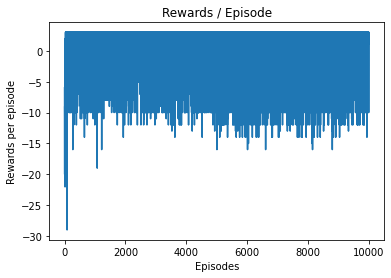

In [53]:
if __name__ == "__main__":
  agent_call = Agent() # Create agent class method
  # call the agent's q_learning function to perform q_learning algorithm on frozen lake
  Q_vals, rewards_per_episode_lst = agent_call.q_learning(episodes=10000, learning_rate=0.5, gamma=0.9, epsilon=0.1)
  print('Action Values at the end of Q-Learning process are:')
  print(Q_vals)
  print("")
  print("----------------------------------------------------------")
  print("")
  print('Rewards per episode are:')
  print(rewards_per_episode_lst)
  print("")
  print("----------------------------------------------------------")
  print("")
  # plotting the points 
  episodes_list = [x[0] for x in rewards_per_episode_lst]
  rewards_list = [x[1] for x in rewards_per_episode_lst]

  print("Plot of the curve of the reward per episode")
  print("")

  plt.plot(episodes_list, rewards_list)  
  # naming the x axis
  plt.xlabel('Episodes')
  # naming the y axis
  plt.ylabel('Rewards per episode')
  # giving a title to my graph
  plt.title('Rewards / Episode')


  
  plt.show()